In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving TATAMOTORS.xlsx to TATAMOTORS (13).xlsx


In [ ]:
import io
tata = pd.read_excel(io.BytesIO(uploaded['TATAMOTORS.xlsx']))
tata = tata.set_index("Date")
tata = tata[['Open','Close']]
tata

,Open,Close
Date,,
2021-08-09,300.750000,298.100006
2021-08-10,297.899994,294.200012
2021-08-11,295.299988,295.450012
2021-08-12,297.299988,306.000000
2021-08-13,308.799988,307.250000
...,...,...
2022-02-02,508.600006,506.399994
2022-02-03,509.100006,504.500000
2022-02-04,503.799988,500.600006


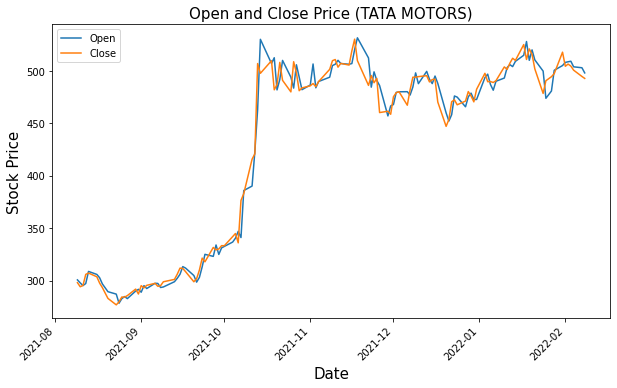

In [ ]:
tata[['Open','Close']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Open and Close Price (TATA MOTORS)',size=15)
plt.show()

Text(0.5, 1.0, 'Open Price (TATA MOTORS)')

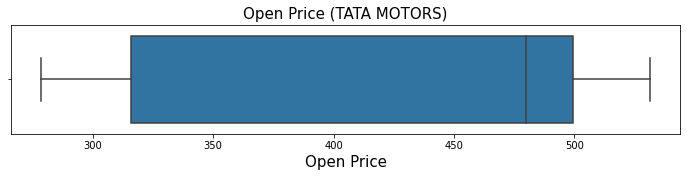

In [ ]:
fig = plt.subplots(figsize=(12, 2))
ax = sns.boxplot(x=tata['Open'],whis=3.5)
plt.xlabel('Open Price',size=15)
plt.title('Open Price (TATA MOTORS)',size=15)

Text(0.5, 1.0, 'Close Price (TATA MOTORS)')

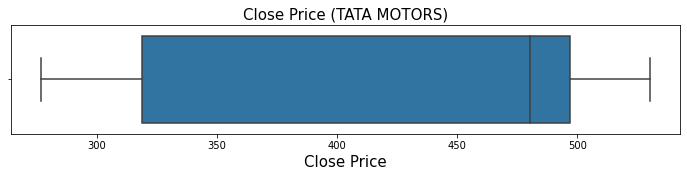

In [ ]:
fig = plt.subplots(figsize=(12, 2))
ax = sns.boxplot(x=tata['Close'],whis=3.5)
plt.xlabel('Close Price',size=15)
plt.title('Close Price (TATA MOTORS)',size=15)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
tata[tata.columns] = Ms.fit_transform(tata)

In [ ]:
training_size = round(len(tata) * 0.70)
train_data = tata[:training_size]
test_data  = tata[training_size:]
train_data.shape, test_data.shape

((88, 2), (38, 2))

In [ ]:
def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(10,len(dataset)): # Selecting 10 rows at a time
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))

In [ ]:
train_seq, train_label = create_sequence(train_data)
test_seq, test_label = create_sequence(test_data)

In [ ]:
train_seq.shape, train_label.shape, test_seq.shape, test_label.shape

((78, 10, 2), (78, 2), (28, 10, 2), (28, 2))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional, TimeDistributed

In [ ]:
model = Sequential()
model.add(Bidirectional(LSTM(units=100, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2]))))

model.add(Dropout(0.1)) 
model.add(Bidirectional(LSTM(units=100)))

model.add(Dense(2))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])
model.build(input_shape = (32,train_seq.shape[1], train_seq.shape[2]))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (32, 10, 200)            82400     
 l)                                                              
                                                                 
 dropout (Dropout)           (32, 10, 200)             0         
                                                                 
 bidirectional_1 (Bidirectio  (32, 200)                240800    
 nal)                                                            
                                                                 
 dense (Dense)               (32, 2)                   402       
                                                                 
Total params: 323,602
Trainable params: 323,602
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(train_seq, train_label, epochs=150,validation_data=(test_seq, test_label), verbose=1)

Epoch 1/150
3/3 [==============================] - 11s 844ms/step - loss: 0.2205 - mean_absolute_error: 0.3733 - val_loss: 0.0036 - val_mean_absolute_error: 0.0500
Epoch 2/150
3/3 [==============================] - 0s 54ms/step - loss: 0.0380 - mean_absolute_error: 0.1455 - val_loss: 0.0856 - val_mean_absolute_error: 0.2808
Epoch 3/150
3/3 [==============================] - 0s 45ms/step - loss: 0.0368 - mean_absolute_error: 0.1530 - val_loss: 0.0041 - val_mean_absolute_error: 0.0505
Epoch 4/150
3/3 [==============================] - 0s 52ms/step - loss: 0.0198 - mean_absolute_error: 0.0929 - val_loss: 0.0294 - val_mean_absolute_error: 0.1619
Epoch 5/150
3/3 [==============================] - 0s 47ms/step - loss: 0.0294 - mean_absolute_error: 0.1237 - val_loss: 0.0192 - val_mean_absolute_error: 0.1229
Epoch 6/150
3/3 [==============================] - 0s 48ms/step - loss: 0.0205 - mean_absolute_error: 0.0975 - val_loss: 0.0029 - val_mean_absolute_error: 0.0405
Epoch 7/150
3/3 [=========

In [ ]:
test_predicted = model.predict(test_seq)
test_predicted[:5]

array([[0.8111743 , 0.83470464],
       [0.80691814, 0.83160436],
       [0.8170133 , 0.8402316 ],
       [0.8379539 , 0.85714096],
       [0.840381  , 0.858524  ]], dtype=float32)

In [ ]:
test_inverse_predicted = Ms.inverse_transform(test_predicted) # Inversing scaling on predicted data
test_inverse_predicted[:5]

array([[483.68655, 488.29724],
       [482.60995, 487.51224],
       [485.1635 , 489.6967 ],
       [490.46045, 493.97812],
       [491.0744 , 494.3283 ]], dtype=float32)

In [ ]:
import io
tata = pd.read_excel(io.BytesIO(uploaded['TATAMOTORS.xlsx']))
tata = tata.set_index("Date")
tata = tata[['Open','Close']]
tata

,Open,Close
Date,,
2021-08-09,300.750000,298.100006
2021-08-10,297.899994,294.200012
2021-08-11,295.299988,295.450012
2021-08-12,297.299988,306.000000
2021-08-13,308.799988,307.250000
...,...,...
2022-02-02,508.600006,506.399994
2022-02-03,509.100006,504.500000
2022-02-04,503.799988,500.600006


In [ ]:
tata = pd.concat([tata.iloc[-28:].copy(),pd.DataFrame(test_inverse_predicted,columns=['Open_predicted','Close_predicted'],index=tata.iloc[-28:].index)], axis=1)
tata

,Open,Close,Open_predicted,Close_predicted
Date,,,,
2021-12-30,472.549988,470.399994,483.686554,488.297241
2021-12-31,472.700012,482.399994,482.609955,487.512238
2022-01-03,493.500000,497.600006,485.163513,489.696686
2022-01-04,496.799988,489.600006,490.460449,493.978119
2022-01-05,486.950012,489.750000,491.074402,494.328308
2022-01-06,481.500000,488.850006,491.606659,494.730865
2022-01-07,490.049988,490.600006,491.461121,494.588318
2022-01-10,493.100006,503.700012,491.239349,494.382172
2022-01-11,503.000000,501.299988,494.833344,497.314667


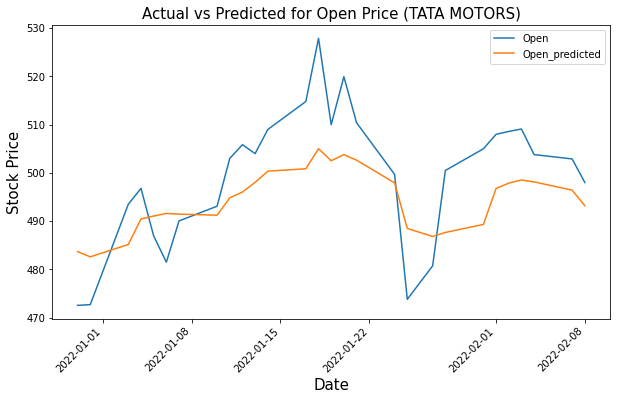

In [ ]:
tata[['Open','Open_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for Open Price (TATA MOTORS)',size=15)
plt.show()

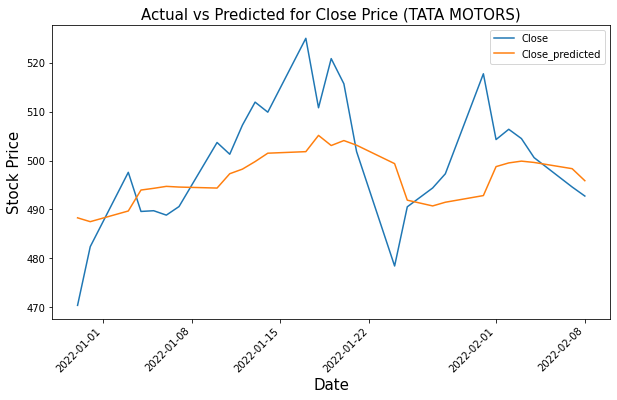

In [ ]:
tata[['Close','Close_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for Close Price (TATA MOTORS)',size=15)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(tata['Open'], tata['Open_predicted'])).round(2)
mape = np.round(np.mean(np.abs(tata['Open']-tata['Open_predicted'])/tata['Open'])*100,2)

tempResults = pd.DataFrame({'Method':['Vanilla LSTM'], 'RMSE': [rmse],'MAPE': [mape] })
tempResults

,Method,RMSE,MAPE
0,Vanilla LSTM,10.25,1.81


In [ ]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(tata['Close'], tata['Close_predicted'])).round(2)
mape = np.round(np.mean(np.abs(tata['Close']-tata['Close_predicted'])/tata['Close'])*100,2)

tempResults = pd.DataFrame({'Method':['Vanilla LSTM'], 'RMSE': [rmse],'MAPE': [mape] })
tempResults

,Method,RMSE,MAPE
0,Vanilla LSTM,10.61,1.66
